In [331]:

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


1. Dataset

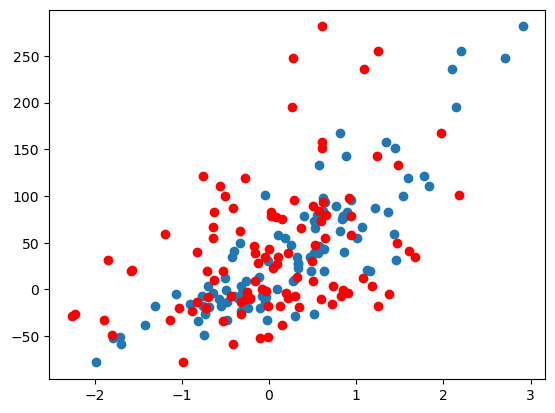

In [332]:
# x, y = make_regression(n_samples=100, n_features=1, noise=5)

# regression lieaire multiple
x, y = make_regression(n_samples=100, n_features=2, noise=5)


# dataset for polynomial model
y = y + abs(y/2)

plt.scatter(x[:,0], y)
plt.scatter(x[:,1], y, c='r')

In [333]:
print(x.shape)

y = y.reshape(y.shape[0], 1)
print(y.shape)


(100, 2)
(100, 1)


In [334]:
#matrice X

X = np.hstack((x, np.ones(x.shape)))

# polynomial
# X = np.hstack((x**2, X))

# multiple
X = np.hstack((x, np.ones((x.shape[0], 1))))

print(X.shape)
X

(100, 3)


array([[-1.98751803e+00, -9.81630652e-01,  1.00000000e+00],
       [-4.84295149e-01, -3.17510273e-01,  1.00000000e+00],
       [-4.90411642e-01,  8.45900143e-01,  1.00000000e+00],
       [-2.61739255e-01,  5.07962241e-01,  1.00000000e+00],
       [-7.79682527e-02, -4.31441647e-01,  1.00000000e+00],
       [ 2.09946804e+00,  1.09077867e+00,  1.00000000e+00],
       [ 5.10638229e-01,  5.94954732e-01,  1.00000000e+00],
       [ 2.52127541e-01,  5.28780858e-01,  1.00000000e+00],
       [-3.34867630e-01,  1.46532100e+00,  1.00000000e+00],
       [ 8.10057987e-01, -3.27077411e-01,  1.00000000e+00],
       [ 1.21397089e+00, -4.08022766e-01,  1.00000000e+00],
       [ 6.34847347e-01,  3.10546750e-04,  1.00000000e+00],
       [ 7.72440509e-01,  4.99570624e-01,  1.00000000e+00],
       [ 1.04746270e-01,  9.40645339e-01,  1.00000000e+00],
       [-6.98486140e-01,  1.17539944e+00,  1.00000000e+00],
       [-6.90828446e-01,  3.39236311e-01,  1.00000000e+00],
       [-1.78712459e+00, -1.05639429e-01

In [335]:
# Vector theta
# theta = np.random.randn(2, 1)

# polynomial
theta = np.random.randn(3, 1)

print(theta.shape)
theta

(3, 1)


array([[-0.23731383],
       [-0.21287916],
       [-0.13187572]])

2. Modele

In [336]:
def model(X, theta):
    return X.dot(theta)

# model(X, theta)

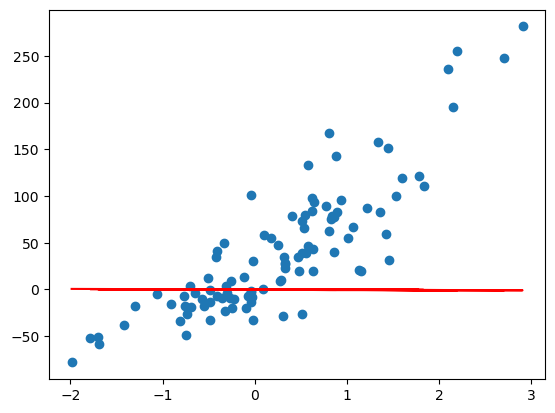

In [337]:
plt.plot(x[:,0], model(X, theta), c='r')
plt.scatter(x[:,0], y)

3. Fonction coût

In [338]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/2*m) * np.sum((model(X, theta) - y)**2)

cost_function(X, y, theta)

32906189.716682356

4. Gradients et descente de gradient

In [339]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [340]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

Machine Learning

In [341]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

theta_final

array([[65.35034699],
       [35.6608992 ],
       [21.78786754]])

(100, 1)


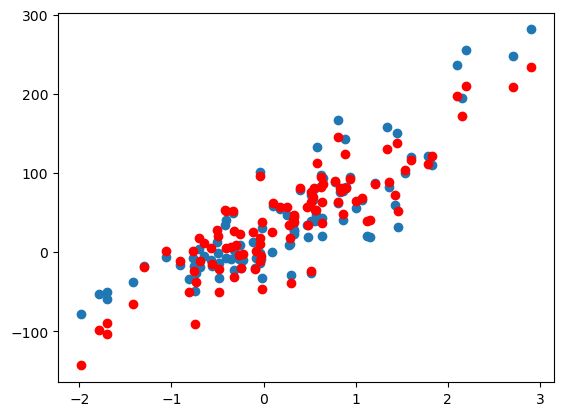

In [342]:
predictions = model(X, theta_final)

print(predictions.shape)

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

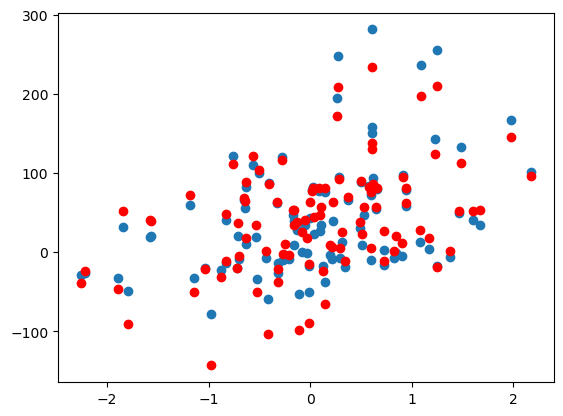

In [343]:
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

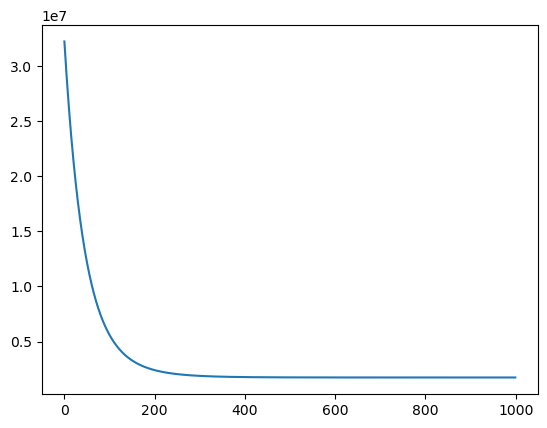

In [344]:
plt.plot(range(1000), cost_history)

Coefficient de determination

In [345]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u/v

coef_determination(y, predictions)

0.9285936288202153